# Exploratory Data Analysis

# Setup

This setup allows you to use *Python* and *R* in the same notebook.

To set up a similar notebook, see quickstart instructions here:

https://github.com/dmil/jupyter-quickstart

Some thoughts on why I like this setup and how I use it at the [end](notebook.ipynb#Thoughts) of  this notebook.

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

This is a Python notebook, but below is an R cell. The `%%R` at the top of the cell indicates that the code in this cell will be R code.

In [3]:
%%R

# My commonly used R imports
require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


# Load Data

In [4]:
df = pd.read_csv('data/combined_data.csv')
df

,ad,cuomo_primary,mamdani_primary,total_primary,mamdani_general,cuomo_general,sliwa_general,adams_general,other_general,total_general,total_pop,pct_white,pct_black,pct_asian,pct_hispanic,median_income,median_age
0,23,6688,3871,11130,9072,19096,7086,82,152,35488,147825,45.75,14.16,9.97,24.29,85222,42.0
1,24,5549,6233,12200,13825,11985,2256,66,113,28245,136161,15.65,12.43,33.11,23.37,92749,42.8
2,25,4329,3928,8648,8420,13485,2485,59,154,24603,118412,21.78,4.60,55.25,14.94,84098,43.6
3,26,7190,5296,13244,9978,20901,5205,70,196,36350,128700,38.50,2.86,39.63,14.78,107053,49.3
4,27,6314,3783,10555,7624,16738,3495,71,136,28064,123443,37.58,5.05,27.07,25.79,83162,41.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,83,8234,3280,12099,9928,7198,616,102,94,17938,132556,1.98,63.31,1.84,27.17,65487,37.1
61,84,4812,3872,9088,10111,6701,810,84,121,17827,134648,2.99,23.69,0.87,69.07,35581,33.9
62,85,5121,2990,8551,8957,7222,923,86,111,17299,130329,2.11,27.39,1.50,66.38,43267,34.3
63,86,4446,2610,7369,7322,5951,664,81,97,14115,132471,1.91,24.94,0.81,70.28,38316,33.7


# Exploratory Data Analysis

> ❓ **Question:** 
> Where did Zohran Mamdani gain support between the Democratic Primary and the General Election?

## Process Data

In [5]:
# calculate two-candidate percentages for GENERAL ELECTION and PRIMARY FINAL ROUND
df['mamdani_general_two_candidate_pct'] = df['mamdani_general'] / (df['mamdani_general'] + df['cuomo_general']) * 100
df['mamdani_primary_final_round_pct'] = df['mamdani_primary'] / (df['mamdani_primary'] + df['cuomo_primary']) * 100

# calculate mamdani general to primary diff
df['mamdani_diff'] = df['mamdani_general_two_candidate_pct'] - df['mamdani_primary_final_round_pct']

df

,ad,cuomo_primary,mamdani_primary,total_primary,mamdani_general,cuomo_general,sliwa_general,adams_general,other_general,total_general,total_pop,pct_white,pct_black,pct_asian,pct_hispanic,median_income,median_age,mamdani_general_two_candidate_pct,mamdani_primary_final_round_pct,mamdani_diff
0,23,6688,3871,11130,9072,19096,7086,82,152,35488,147825,45.75,14.16,9.97,24.29,85222,42.0,32.206759,36.660669,-4.453909
1,24,5549,6233,12200,13825,11985,2256,66,113,28245,136161,15.65,12.43,33.11,23.37,92749,42.8,53.564510,52.902733,0.661777
2,25,4329,3928,8648,8420,13485,2485,59,154,24603,118412,21.78,4.60,55.25,14.94,84098,43.6,38.438713,47.571757,-9.133045
3,26,7190,5296,13244,9978,20901,5205,70,196,36350,128700,38.50,2.86,39.63,14.78,107053,49.3,32.313223,42.415505,-10.102283
4,27,6314,3783,10555,7624,16738,3495,71,136,28064,123443,37.58,5.05,27.07,25.79,83162,41.9,31.294639,37.466574,-6.171935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,83,8234,3280,12099,9928,7198,616,102,94,17938,132556,1.98,63.31,1.84,27.17,65487,37.1,57.970337,28.487059,29.483278
61,84,4812,3872,9088,10111,6701,810,84,121,17827,134648,2.99,23.69,0.87,69.07,35581,33.9,60.141566,44.587748,15.553818
62,85,5121,2990,8551,8957,7222,923,86,111,17299,130329,2.11,27.39,1.50,66.38,43267,34.3,55.361889,36.863519,18.498370
63,86,4446,2610,7369,7322,5951,664,81,97,14115,132471,1.91,24.94,0.81,70.28,38316,33.7,55.164620,36.989796,18.174824



## Exploratory Data Visualization

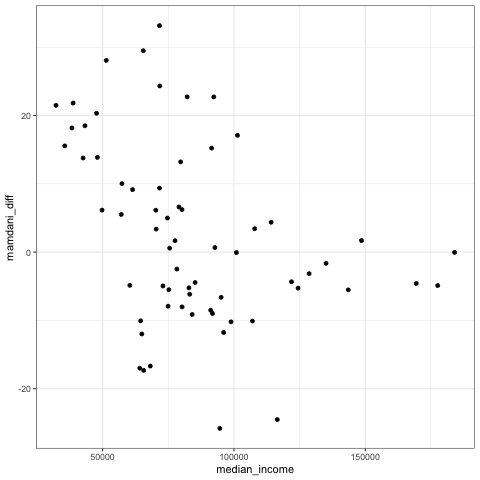

In [10]:
%%R -i df 

# Make some scatter plots to visualize relationships in this cell and the ones below (mamdani_diff can be on the Y axis).
# you can make them with ggplot in R or just delete the %%R at the top of the cell and use whatever python library you prefer.

ggplot(df) + 
    aes(x = median_income, y = mamdani_diff) +
    geom_point() +
    theme_bw()

## Exploratory Regression Analysis

In [7]:
%%R -i df

model <- lm(mamdani_diff ~ median_income, data=df)
# options(scipen = 999) # show in non-scientific notation
summary(model)


Call:
lm(formula = mamdani_diff ~ median_income, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-26.7489  -9.2652   0.9472   7.0755  28.6502 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.566e+01  4.257e+00   3.677 0.000489 ***
median_income -1.556e-04  4.691e-05  -3.316 0.001517 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.36 on 63 degrees of freedom
Multiple R-squared:  0.1486,	Adjusted R-squared:  0.1351 
F-statistic:    11 on 1 and 63 DF,  p-value: 0.001517

